<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

## Following the instructor's respective sections, this notebook has its codes in parts:
- ### Part 1. Model development using training data set
- ### Part 2. Model evaluation using test data set

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [4]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [5]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-12-29 22:07:36--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.02s   

2019-12-29 22:07:37 (1.06 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [6]:
df = pd.read_csv('loan_train.csv')
df.columns
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [7]:
df.shape

(346, 10)

### Convert to date time object 

In [8]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [9]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [10]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    numpy-base-1.15.4          |   py36h81de0dd_0         4.2 MB  anaconda
    numpy-1.15.4               |   py36h1d66e8a_0          35 KB  anaconda
    pyqt-5.6.0                 |           py36_2         5.4 MB  anaconda
    matplotlib-2.2.2           |   py36hb69df0a_2         6.6 MB  anaconda
    libgcc-7.2.0               |       h69d50b8_2         304 KB  anaconda
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    sip-4.19.13                |   py36he6710b0_0         293 KB  anaconda


In [107]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

AttributeError: module 'numpy.core.numerictypes' has no attribute '_typestr'

In [11]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

NameError: name 'sns' is not defined

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

In [12]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


NameError: name 'sns' is not defined

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [13]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [14]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [15]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [16]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [17]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [18]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [19]:
X = Feature
X[0:5]
#X.columns

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [20]:
y = df['loan_status'].values
y[0:5]


array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

Yes: I use the normalizer from train set and apply this mean centering and scale normalizing on both the sets

In [135]:
#X= preprocessing.StandardScaler().fit(X).transform(X.astype(float))
# stdnorm=preprocessing.StandardScaler().fit(X_train)
# X_train=stdnorm.transform(X_train)
# X_test=stdnorm.transform(X_test)
#X[0:5]

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# Part 1. Model development using training data set (finding best k and other fine tuning parameters)
- ### Approach: For data, X, y from loan_train.csv file, a 4-fold cross-validation approach, for this size of dataset, was considered appropriate to select the best k and other parameters using the average accuracy from the predictions for the test sets generated from the loan_train.csv data file.

# 1.1 K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

- ## Determine the best k for KNN using cross-validation assessment.
- ### Normalize the data array X from df. The normalizer is determined for whole of X and the normalized n_X will undergo 4-fold splits.  

In [21]:
# normalize the X
normalizer=preprocessing.StandardScaler().fit(X.astype(float))
n_X=normalizer.transform(X.astype(float))
n_X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

[0.6509957230686982, 0.6252673082063619, 0.6999799518845229, 0.6741512964448009, 0.7172881582464582, 0.6916933974873029, 0.6972066292435178, 0.6656308473670142, 0.6625902165196472]
Length of list 9
Max of list 0.7172881582464582


Text(0, 0.5, 'Cross-validated accuracy')

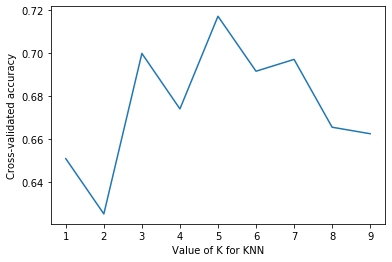

In [22]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# search for an optimal value of K for KNN

k_range = range(1, 10)        # range of k to try within
k_scores = []                 

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, n_X, y, cv=4, scoring='accuracy')
    k_scores.append(scores.mean())

print(k_scores)

print('Length of list', len(k_scores))
print('Max of list', max(k_scores))
# plot how accuracy changes as we vary k

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

- ### Selected model k: From the above plot, k=5 was determined to be the best, for a search within 10 NN (heuristically set maximum value considering the data size). 
- ### Continued in Part 2.1 for the accuracy from the test dataset in loan_test.csv.

# 1.2 Decision Tree
- ## Approach: The best depth level k using 4-fold cross-validation assessment of average accuracy.

In [23]:
import numpy as np 
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

   depth    scores
0      1  0.636528
1      2  0.587677
2      3  0.642275
3      4  0.642241
4      5  0.607825
5      6  0.599071
6      7  0.639535
Length of list:  7 Max of list : 0.6422747928361401


Text(0, 0.5, 'Cross-validated accuracy')

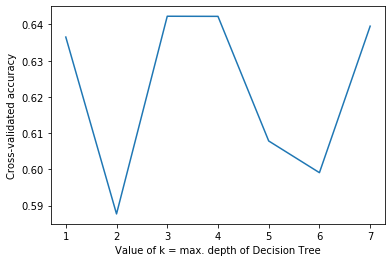

In [27]:

# search for best depth
k_scores = []
k_depth=range(1,8)        #search within this maximum depth range
for i in k_depth:
    clf = tree.DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(estimator=clf, X=n_X, y=y, cv=4, scoring='accuracy', n_jobs=4)
    k_scores.append(scores.mean())
    
print(pd.DataFrame({'depth':k_depth, 'scores': k_scores}))


import matplotlib.pyplot as plt
%matplotlib inline

print('Length of list: ', len(k_scores), 'Max of list :', max(k_scores))
plt.plot( k_depth, k_scores)
plt.xlabel('Value of k = max. depth of Decision Tree')
plt.ylabel('Cross-validated accuracy')

- ### Selected model k: From the above plot, k=4 was determined to be the best, for a search within maximum depth equal to 8 (variables).
- ### Continued in Part 2.2 for the accuracy from the test dataset in loan_test.csv.

In [25]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge

The following packages will be UPDATED:

    certifi: 2019.11.28-py36_0 anaconda --> 2019.11.28-py36_0 conda-forge

The following packages will be DOWNGRADED:

    openssl: 1.1.1-h7b6447c_0  anaconda --> 1.1.1d-h516909a_0 conda-forge


certifi-2019.11.28   | 149 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done


==> WARNING: A 

In [28]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

dot_data = StringIO()
filename = "loan_defaulttree.png"
featureNames = df.columns[1:9]      #df.columns[0:8]
targetNames = df["loan_status"].unique().tolist()
out=tree.export_graphviz(loan_defaultTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

NameError: name 'loan_defaultTree' is not defined

# 1.3 Support Vector Machine
- ### Approach: Determine the best parameter combinations of: the kernel (linear, 'brf', poly(degree: 2,3), sigmoid) and c= 0.001,0.01, 0.1, 1, 2 using a 4-old cross-validation assessment of the accuracy.

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm
import itertools
for kern in ['rbf', 'sigmoid']:
    for c in [0.001,.01, .1, 1,2]:
        clf = svm.SVC(kernel=kern, C=c, gamma='auto')
        scores = cross_val_score(clf, X=n_X, y=y, cv=10)
        print("C= ", c, "Kernel= ", kern, "Accuracy= ", round(scores.mean(),4) ) #print(scores)
#Polynomial       
for deg in [1,2,3,4]:
    for c in [.001, .01, .1, 1,2]:
        clf = svm.SVC(kernel='poly', degree=deg, C=c, gamma='auto')
        scores = cross_val_score(clf, X=n_X, y=y, cv=10)
        print("Polynomial degree= ", deg, "C= ", c,"Accuracy= ", round(scores.mean(),4) ) #print(scores)
#array([0.96..., 1.  ..., 0.96..., 0.96..., 1.        ])

C=  0.001 Kernel=  rbf Accuracy=  0.7516
C=  0.01 Kernel=  rbf Accuracy=  0.7516
C=  0.1 Kernel=  rbf Accuracy=  0.7516
C=  1 Kernel=  rbf Accuracy=  0.7287
C=  2 Kernel=  rbf Accuracy=  0.706
C=  0.001 Kernel=  sigmoid Accuracy=  0.7516
C=  0.01 Kernel=  sigmoid Accuracy=  0.7516
C=  0.1 Kernel=  sigmoid Accuracy=  0.7516
C=  1 Kernel=  sigmoid Accuracy=  0.6771
C=  2 Kernel=  sigmoid Accuracy=  0.6602
Polynomial degree=  1 C=  0.001 Accuracy=  0.7516
Polynomial degree=  1 C=  0.01 Accuracy=  0.7516
Polynomial degree=  1 C=  0.1 Accuracy=  0.7516
Polynomial degree=  1 C=  1 Accuracy=  0.7516
Polynomial degree=  1 C=  2 Accuracy=  0.7516
Polynomial degree=  2 C=  0.001 Accuracy=  0.7516
Polynomial degree=  2 C=  0.01 Accuracy=  0.7516
Polynomial degree=  2 C=  0.1 Accuracy=  0.7516
Polynomial degree=  2 C=  1 Accuracy=  0.7516
Polynomial degree=  2 C=  2 Accuracy=  0.7516
Polynomial degree=  3 C=  0.001 Accuracy=  0.7516
Polynomial degree=  3 C=  0.01 Accuracy=  0.7516
Polynomial degre

- ### Selected hyperparameters for the model for the SVC/SVM: kernel= 'rbf', C = 0.001
- ### Continued in Part 2.3 for the accuracy from the test dataset in loan_test.csv.

# 1.4 Logistic Regression
- ### Approach: Determine the best combination of C from (0.001, 0.01, 0.1, 1, 10) and solver from ('lbfgs','liblinear') using a 4-fold cross-validation assessment of accuracy.

In [30]:
# 4-fold cross-validation with logistic regression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm
import itertools
from sklearn.linear_model import LogisticRegression

for c in [.001, 0.01, .1, 1, 10]:
    logreg = LogisticRegression(C=c, solver='lbfgs')
    print("lbfgs: ","C= ", c, "Accuracy= ", cross_val_score(logreg, X=n_X, y=y, cv=4, scoring='accuracy').mean())
    
for c in [.001, 0.01, .1, 1, 10]:
    logreg = LogisticRegression(C=c, solver='liblinear')
    print("liblinear: ", "C= ", c, "Accuracy= ", cross_val_score(logreg, X=n_X, y=y, cv=10, scoring='accuracy').mean())

lbfgs:  C=  0.001 Accuracy=  0.7514701951349906
lbfgs:  C=  0.01 Accuracy=  0.7514701951349906
lbfgs:  C=  0.1 Accuracy=  0.7083667468591286
lbfgs:  C=  1 Accuracy=  0.6480219192729217
lbfgs:  C=  10 Accuracy=  0.6394012296177493
liblinear:  C=  0.001 Accuracy=  0.6830252100840336
liblinear:  C=  0.01 Accuracy=  0.6944537815126051
liblinear:  C=  0.1 Accuracy=  0.7058823529411764
liblinear:  C=  1 Accuracy=  0.7002521008403362
liblinear:  C=  10 Accuracy=  0.6945378151260504


- ### Selected hyperparameters for the model for the logistic regression function: C = 0.001 and solver='lbfgs'
- ### Continued in Part 2.4 for the accuracy from the test dataset in loan_test.csv.

# Part 2. Model Evaluation using Test set

In [31]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [32]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-12-29 22:19:44--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2019-12-29 22:19:44 (9.06 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [33]:
newtest_df = pd.read_csv('loan_test.csv')
newtest_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [34]:
newtest_df['due_date'] = pd.to_datetime(newtest_df['due_date'])
newtest_df['effective_date'] = pd.to_datetime(newtest_df['effective_date'])
newtest_df['dayofweek'] = newtest_df['effective_date'].dt.dayofweek

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

newtest_df['dayofweek'] = newtest_df['effective_date'].dt.dayofweek

bins = np.linspace(newtest_df.dayofweek.min(), newtest_df.dayofweek.max(), 10)
g = sns.FacetGrid(newtest_df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

AttributeError: module 'numpy.core.numerictypes' has no attribute '_typestr'

In [36]:
newtest_df['weekend'] = newtest_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
newtest_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


In [37]:
newtest_df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.727273
        COLLECTION     0.272727
male    PAIDOFF        0.744186
        COLLECTION     0.255814
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [38]:
newtest_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
newtest_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


## One Hot Encoding  
#### How about education?

In [39]:
newtest_df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        1.000000
High School or Below  PAIDOFF        0.523810
                      COLLECTION     0.476190
Master or Above       PAIDOFF        1.000000
college               PAIDOFF        0.826087
                      COLLECTION     0.173913
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [40]:
newtest_df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,50,1,Bechalor
1,300,7,35,0,Master or Above
2,1000,30,43,1,High School or Below
3,1000,30,26,0,college
4,800,15,29,0,Bechalor


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [41]:
newtest_Feature = newtest_df[['Principal','terms','age','Gender','weekend']]
newtest_Feature = pd.concat([newtest_Feature,pd.get_dummies(newtest_df['education'])], axis=1)
newtest_Feature.drop(['Master or Above'], axis = 1,inplace=True)         # non-discriminating variable: Master or Above
newtest_Feature.head()
#newtest_Feature.shape

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


### Feature selection

Lets defind feature sets, X:

What are our lables?

In [42]:
newtest_X = newtest_Feature
print(newtest_X[0:5])
newtest_X.columns

   Principal  terms  age  Gender  weekend  Bechalor  High School or Below  \
0       1000     30   50       1        0         1                     0   
1        300      7   35       0        1         0                     0   
2       1000     30   43       1        1         0                     1   
3       1000     30   26       0        1         0                     0   
4        800     15   29       0        1         1                     0   

   college  
0        0  
1        0  
2        0  
3        1  
4        0  


Index(['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bechalor',
       'High School or Below', 'college'],
      dtype='object')

In [43]:
newtest_y = newtest_df['loan_status'].values
newtest_y[0:5]


array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

- ### Apply the same/previous normalizer (based on the full training set from loan_train.csv)

In [44]:
# normalizer=preprocessing.StandardScaler().fit(X.astype(float))

n_newtest_X=normalizer.transform(newtest_X.astype(float))

#print(newtest_X[0:5])
n_newtest_X[0:5]

array([[ 0.51578458,  0.92071769,  3.16061891,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [-5.89052444, -1.96168647,  0.67333883, -0.42056004,  0.82934003,
        -0.38170062, -0.87997669, -0.86968108],
       [ 0.51578458,  0.92071769,  1.9998882 ,  2.37778177,  0.82934003,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769, -0.81902922, -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [-1.31458942, -0.95911111, -0.3215732 , -0.42056004,  0.82934003,
         2.61985426, -0.87997669, -0.86968108]])

In [45]:
# Create a blank Report
Report=pd.DataFrame(data={'Algorithm':['KNN','Decision Tree', 'SVM', 'LogisticRegression']}, columns=['Algorithm', 'Jaccard', 'F1-score', 'LogLoss'] )
Report['LogLoss'][0:3]='NA'        #Report.fillna('NA',inplace=True)
#Report.style.hide_index()

# 2.1. K Nearest Neighbor(KNN)
- #### Model: k=5, data: n_newtest_X (the test set X normalized using full training set in loan_train.csv) and newtest_y (test set data file: loan_test.csv)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
k = 5

#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(n_X,y)            # using all of the training data.
neigh      
newtest_yhat = neigh.predict(n_newtest_X)
#print(newtest_yhat[0:5])

from sklearn import metrics
print("New Test set Accuracy: ", metrics.accuracy_score(newtest_y, newtest_yhat))     # same as Jaccard

from sklearn.metrics import f1_score
print("F1 score=", f1_score(newtest_y, newtest_yhat, average='weighted') )

from sklearn.metrics import jaccard_similarity_score
print("Jaccard =", jaccard_similarity_score(newtest_y, newtest_yhat))

Report['Jaccard'][0]=jaccard_similarity_score(newtest_y, newtest_yhat)
Report['F1-score'][0]=f1_score(newtest_y, newtest_yhat, average='weighted')
#Report.style.hide_index()

New Test set Accuracy:  0.7222222222222222
F1 score= 0.7001989201477693
Jaccard = 0.7222222222222222


# 2.2  Decision Tree
- #### Model: k (maximum depth)= 4, data: n_newtest_X (the test set X normalized using full training set in loan_train.csv) and newtest_y (test set data file: loan_test.csv)

In [47]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [48]:
# DT, k=4
loan_defaultTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
#print(loan_defaultTree) # it shows the default parameters

loan_defaultTree.fit(n_X, y)      

newpredTree = loan_defaultTree.predict(n_newtest_X)
#print (newpredTree [0:5])
#print (newtest_y [0:5])

# Compute confusion matrix
#cnf_matrix = confusion_matrix(newtest_y, newpredTree, labels=['PAIDOFF', 'COLLECTION'])
#np.set_printoptions(precision=2)
#print(cnf_matrix)
#print (classification_report(newtest_y, newpredTree))

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(newtest_y, newpredTree))

from sklearn.metrics import f1_score
print("F1 score=", f1_score(newtest_y, newpredTree, average='weighted') )

from sklearn.metrics import jaccard_similarity_score
print("Jaccard =", jaccard_similarity_score(newtest_y, newpredTree))

Report['Jaccard'][1]=jaccard_similarity_score(newtest_y, newpredTree)
Report['F1-score'][1]=f1_score(newtest_y, newpredTree, average='weighted')
#Report.style.hide_index() 

DecisionTrees's Accuracy:  0.7592592592592593
F1 score= 0.6959228135698723
Jaccard = 0.7592592592592593


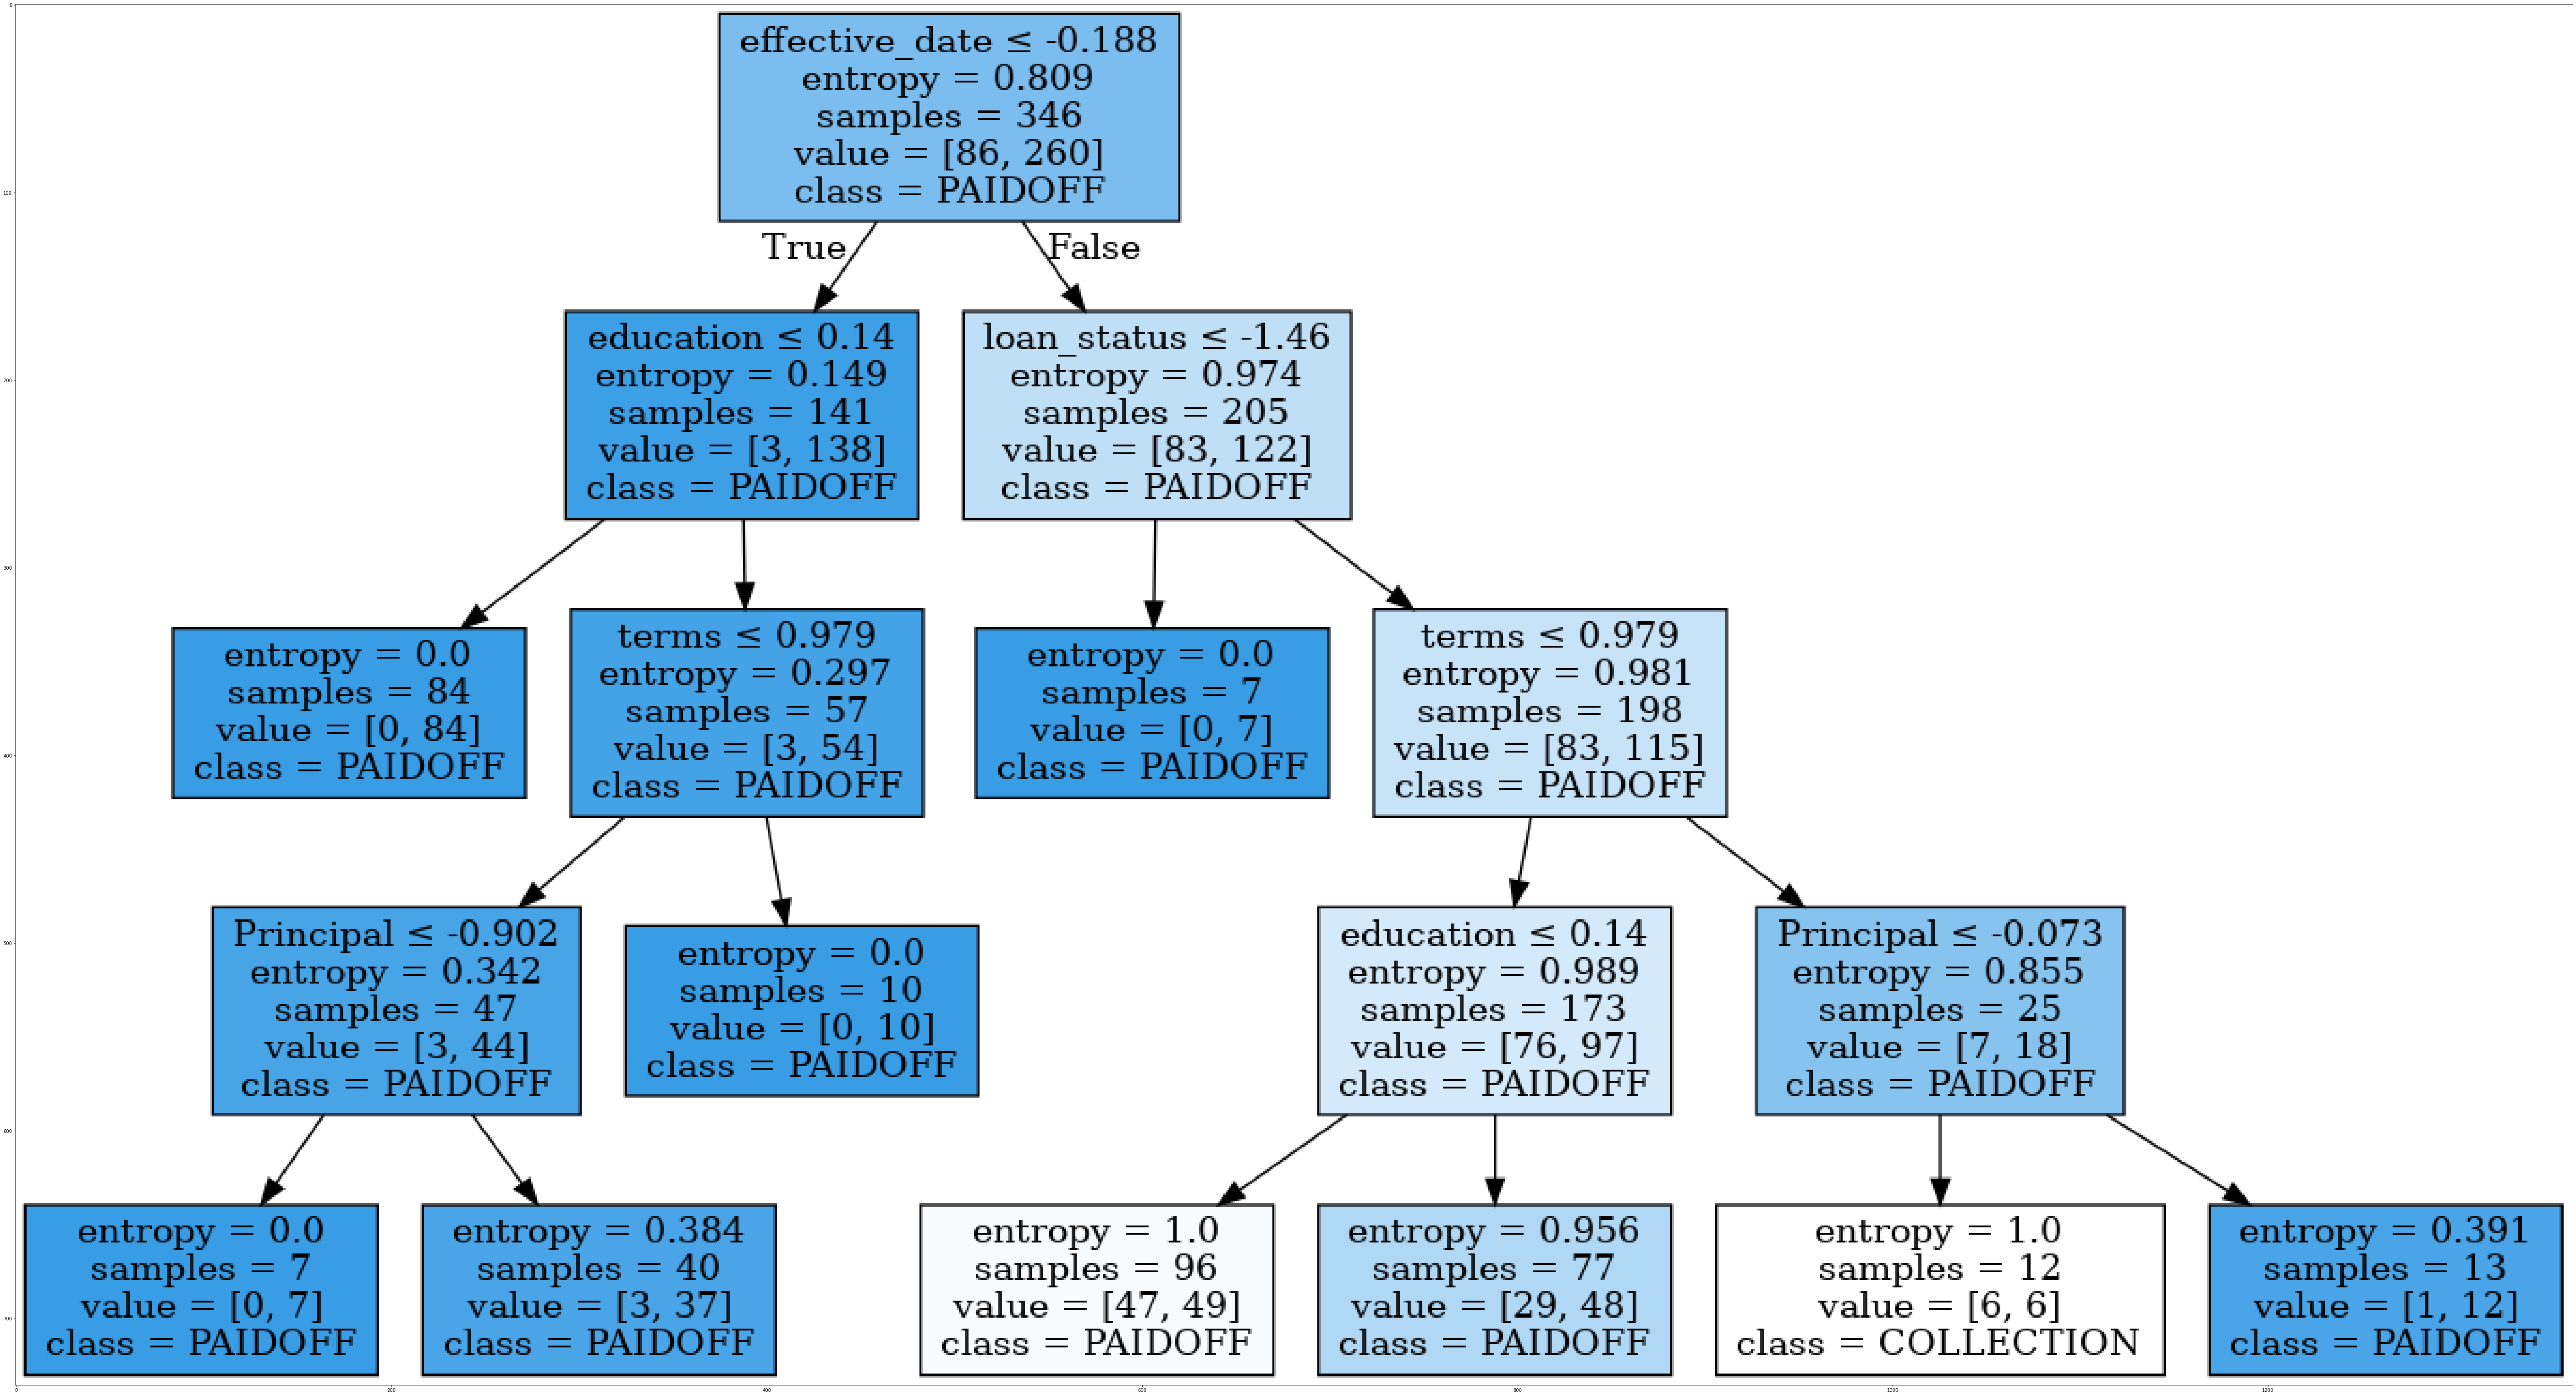

In [49]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

dot_data = StringIO()
#filename = "loan_defaulttree.png"
filename = "newpredtree.png"
featureNames = df.columns[1:9]      #df.columns[0:8]
targetNames = df["loan_status"].unique().tolist()
#out=tree.export_graphviz(loan_defaultTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
out=tree.export_graphviz(loan_defaultTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(newtest_y), filled=True,  special_characters=True,rotate=False)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# 2.3 Support Vector Machine (SVM)
- ### Selected hyperparameters for the model for the SVC/SVM: kernel= 'rbf', C = 0.001; data: n_newtest_X (the test set X normalized using full training set in loan_train.csv) and newtest_y (test set data file: loan_test.csv)

In [50]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools

clf = svm.SVC(kernel='rbf', C=0.001)
clf.fit(n_X, y)      


newtest_svm_yhat = clf.predict(n_newtest_X)
#print(newtest_svm_yhat [0:5])

from sklearn.metrics import f1_score
print("F1 score=", f1_score(newtest_y, newtest_svm_yhat, average='weighted') )

from sklearn.metrics import jaccard_similarity_score
print("Jaccard =", jaccard_similarity_score(newtest_y, newtest_svm_yhat))

Report['Jaccard'][2]=jaccard_similarity_score(newtest_y, newtest_svm_yhat)
Report['F1-score'][2]=f1_score(newtest_y, newtest_svm_yhat, average='weighted')
#Report.style.hide_index()

F1 score= 0.6304176516942475
Jaccard = 0.7407407407407407


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# 2.4 Logistic Regression
- ### Selected hyperparameters for the model for the logistic regression function: C = 0.001 and solver='lbfgs'; data: n_newtest_X (the test set X normalized using full training set in loan_train.csv) and newtest_y (test set data file: loan_test.csv)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=0.001, solver='lbfgs').fit(n_X,y)
#print(LR)

newtest_lr_yhat = LR.predict(n_newtest_X)
#print(newtest_lr_yhat[0:5])
newtest_lr_yhat_prob = LR.predict_proba(n_newtest_X)
newtest_lr_yhat_prob[0:5]

from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(newtest_y, newtest_lr_yhat)

from sklearn.metrics import log_loss
print("LogLoss =", log_loss(newtest_y, newtest_lr_yhat_prob))

from sklearn.metrics import f1_score
print("F1 score=", f1_score(newtest_y, newtest_lr_yhat, average='weighted') )

from sklearn.metrics import jaccard_similarity_score
print("Jaccard =", jaccard_similarity_score(newtest_y, newtest_lr_yhat))

Report['Jaccard'][3]=jaccard_similarity_score(newtest_y, newtest_lr_yhat)
Report['F1-score'][3]=f1_score(newtest_y, newtest_lr_yhat, average='weighted')
Report['LogLoss'][3] =log_loss(newtest_y, newtest_lr_yhat_prob)

Report.style.hide_index()

LogLoss = 0.561892465891418
F1 score= 0.6304176516942475
Jaccard = 0.7407407407407407


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Algorithm,Jaccard,F1-score,LogLoss
KNN,0.722222,0.700199,NA
Decision Tree,0.759259,0.695923,NA
SVM,0.740741,0.630418,NA
LogisticRegression,0.740741,0.630418,0.561892


In [52]:
# Print the predicted y values for new test
pred_newtest=pd.DataFrame({'newtest_y': newtest_y,'newtest_yhat': newtest_yhat, 'newpredTree':newpredTree, 'newtest_svm_yhat': newtest_svm_yhat, 'newtest_lr_yhat':newtest_lr_yhat})
print("Actual vs predicted loan status:")
pred_newtest.head()

Actual vs predicted loan status:


,newtest_y,newtest_yhat,newpredTree,newtest_svm_yhat,newtest_lr_yhat
0,PAIDOFF,PAIDOFF,PAIDOFF,PAIDOFF,PAIDOFF
1,PAIDOFF,PAIDOFF,PAIDOFF,PAIDOFF,PAIDOFF
2,PAIDOFF,PAIDOFF,PAIDOFF,PAIDOFF,PAIDOFF
3,PAIDOFF,PAIDOFF,PAIDOFF,PAIDOFF,PAIDOFF
4,PAIDOFF,COLLECTION,PAIDOFF,PAIDOFF,PAIDOFF


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:
- ## The report is in the following table.

In [53]:
Report.style.hide_index()

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.722222,0.700199,NA
Decision Tree,0.759259,0.695923,NA
SVM,0.740741,0.630418,NA
LogisticRegression,0.740741,0.630418,0.561892


# Thanks
# THE END

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>